In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

In [2]:
# pick f as a function of z
f_text = "exp(-z^2)+i*z"
#f_text = "log(exp(z)-3+exp(-z)-z^2)"
sym.sympify(f_text)

i*z + exp(-z**2)

In [3]:
# make it symbolic
f_z = sym.sympify(f_text)

# replace f(z) by f(x+iy)
x, y = sym.symbols("x y", real=True)
f_xy = f_z.subs("z", x + y * 1j)
f_xy = f_xy.subs("i", 1j)

# Cauchy-Riemann Eqns
u = sym.re(f_xy)
v = sym.im(f_xy)
ux = u.diff(x)
vx = v.diff(x)
uy = u.diff(y)
vy = v.diff(y)
uxEQvy = (ux - vy).simplify() == 0
uyEQnvx = (uy + vx).simplify() == 0
#uyEQnvx=True
#uxEQvy=True

In [4]:
if uxEQvy and uyEQnvx:
    print("Cauchy-Riemann Equations satisfied")
else:
    raise Warning("Cauchy-Riemann Equations not satisfied")

Cauchy-Riemann Equations satisfied


In [5]:
# mpl setup
plt.rcParams.update({"axes.grid": True, "grid.alpha": 0.75, "image.cmap": "jet", "lines.markersize": 1})

# Function Visualization

In [6]:
Xrange = [-10, 10]
Yrange = [-10, 10]
pts = np.meshgrid(np.linspace(*[*Xrange, 250]), np.linspace(*[*Yrange, 250]))
X = pts[0]
Y = pts[1]

fNumpy = sym.lambdify((x, y), f_xy, "numpy")
fPts = fNumpy(X, Y)

# Real and Imagnary Parts

<Figure size 640x480 with 0 Axes>

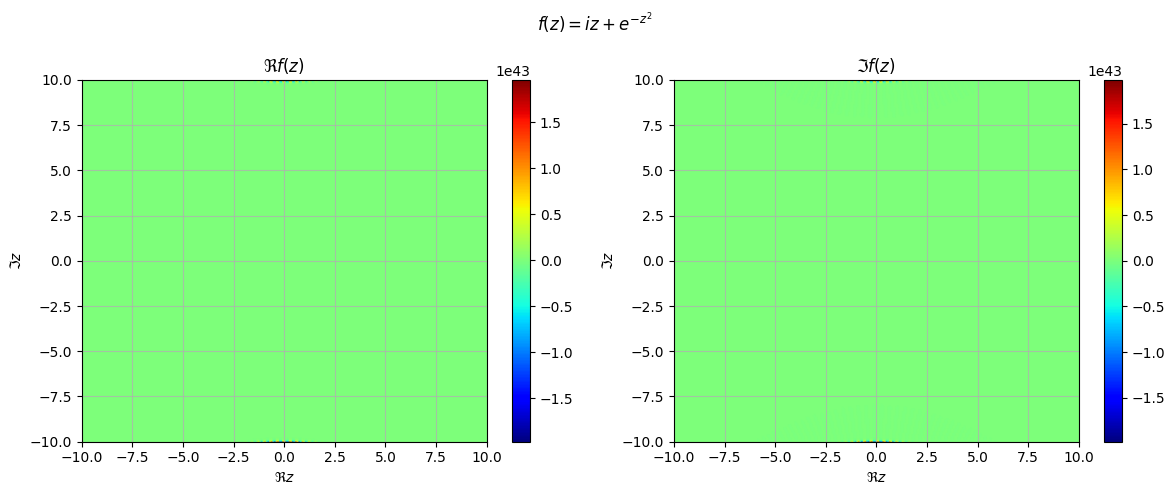

In [7]:
plt.set_cmap("jet")
plt.figure(figsize=(12, 5))
plt.suptitle("$f(z)=" + sym.latex(f_z) + "$")
plt.subplot(1, 2, 1)
plt.scatter(X, Y, c=np.real(fPts))
plt.xlabel("$\Re z$")
plt.ylabel("$\Im z$")
plt.title("$\Re f(z)$")
plt.axis([*Xrange, *Yrange])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X, Y, c=np.imag(fPts))
plt.xlabel("$\Re z$")
plt.ylabel("$\Im z$")
plt.title("$\Im f(z)$")
plt.axis([*Xrange, *Yrange])
plt.colorbar()

plt.tight_layout()

# Magnitude and Angle

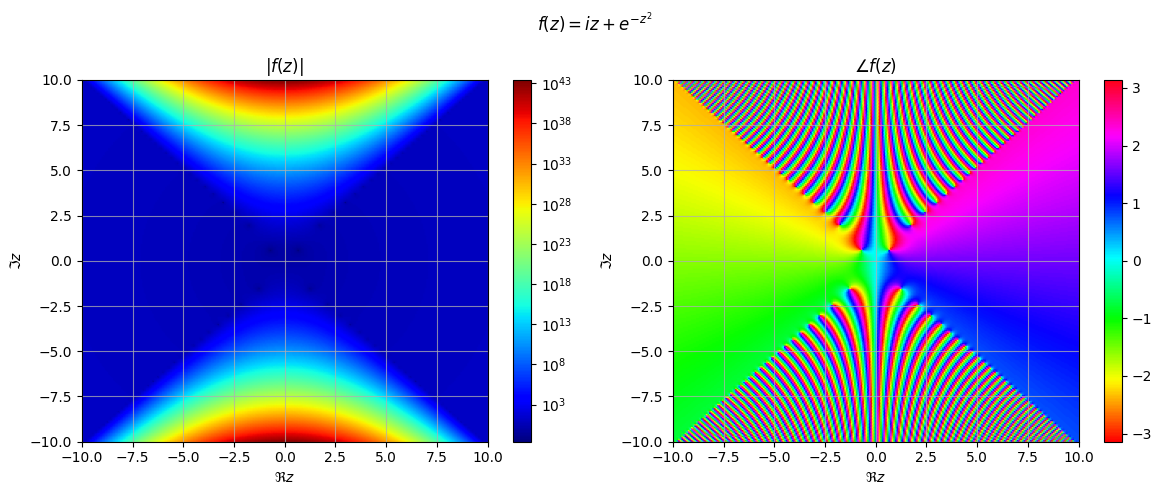

In [8]:
plt.figure(figsize=(12,5))
plt.suptitle("$f(z)="+sym.latex(f_z)+"$")
plt.subplot(1,2,1)
if(np.max(np.abs(fPts)) > 1e4 * np.median(np.abs(fPts))):
    plt.scatter(X, Y, c=np.abs(fPts), norm=col.LogNorm())
else:
    plt.scatter(X, Y, c=np.abs(fPts))
plt.xlabel("$\Re z$"); plt.ylabel("$\Im z$")
plt.title("$|f(z)|$")
plt.axis([*Xrange, *Yrange])
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(X, Y, c=np.angle(fPts), cmap="hsv")
plt.xlabel("$\Re z$"); plt.ylabel("$\Im z$")
plt.title("$\\angle f(z)$")
plt.axis([*Xrange, *Yrange])
plt.colorbar()

plt.tight_layout()

# Mapping

In [9]:
theta = np.linspace(0,2*np.pi, int(1e4))
fUnitCirc = fNumpy(np.cos(theta),np.sin(theta))

linScale = np.linspace(-100,100,int(1e4))
fReAx = fNumpy(linScale, 0)
fImAx = fNumpy(0, linScale)

spacedFour = np.linspace(0,4,int(1e4))
sideNum = np.floor(spacedFour)
spacedFour = 2*np.mod(spacedFour,1) - 1
zUnitSquare = (sideNum==0) * (1+ spacedFour*1j) + (sideNum==1) * (1j - spacedFour) + (sideNum==2) * (-1 - 1j*spacedFour) + (sideNum==3) * (-1j + spacedFour)
fUnitSquare = fNumpy(np.real(zUnitSquare), np.imag(zUnitSquare))

<lambdifygenerated-1>:2: RuntimeWarning: overflow encountered in exp
  return 1.0*1j*(x + 1.0*1j*y) + exp(-(x + 1.0*1j*y)**2)


C:\Users\imll1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\ticker.py:2096: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


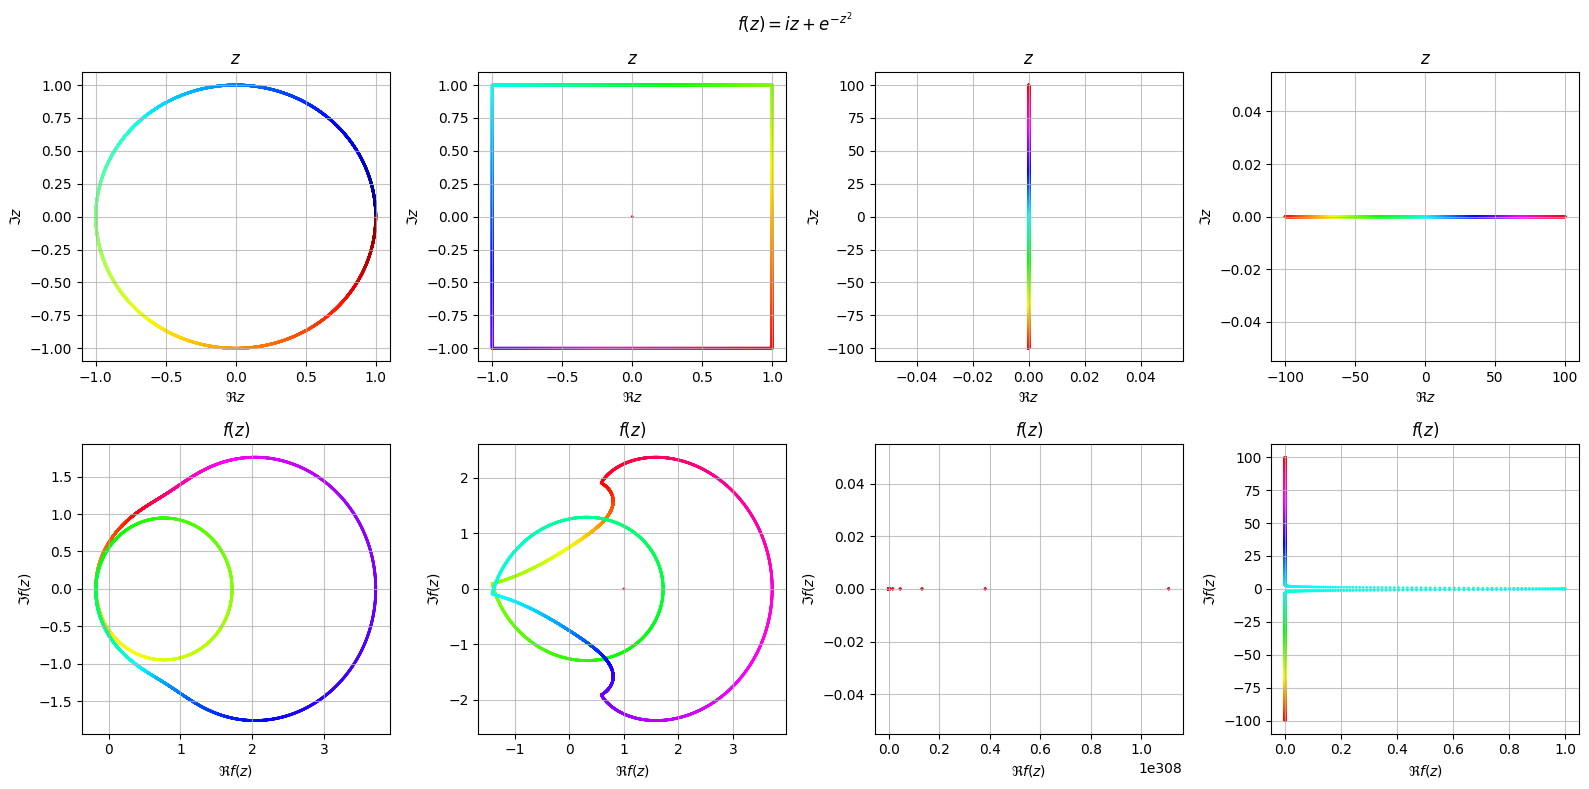

In [10]:
plt.figure(figsize=(16, 8))
plt.suptitle("$f(z)=" + sym.latex(f_z) + "$")

plt.subplot(2, 4, 1)
plt.scatter(np.cos(theta), np.sin(theta), c=theta)
plt.xlabel("$\Re z$")
plt.ylabel("$\Im z$")
plt.title("$z$")

plt.subplot(2, 4, 1 + 4)
plt.scatter(np.real(fUnitCirc), np.imag(fUnitCirc), c=theta, cmap="hsv")
plt.xlabel("$\Re f(z)$")
plt.ylabel("$\Im f(z)$")
plt.title("$f(z)$")

plt.subplot(2, 4, 2)
plt.scatter(np.real(zUnitSquare), np.imag(zUnitSquare), c=linScale, cmap="hsv")
plt.xlabel("$\Re z$")
plt.ylabel("$\Im z$")
plt.title("$z$")

plt.subplot(2, 4, 2 + 4)
plt.scatter(np.real(fUnitSquare), np.imag(fUnitSquare), c=linScale, cmap="hsv")
plt.xlabel("$\Re f(z)$")
plt.ylabel("$\Im f(z)$")
plt.title("$f(z)$")

plt.subplot(2, 4, 4)
plt.scatter(linScale, 0 * linScale, c=linScale, cmap="hsv")
plt.xlabel("$\Re z$")
plt.ylabel("$\Im z$")
plt.title("$z$")

plt.subplot(2, 4, 4 + 4)
plt.scatter(np.real(fReAx), np.imag(fReAx), c=linScale, cmap="hsv")
plt.xlabel("$\Re f(z)$")
plt.ylabel("$\Im f(z)$")
plt.title("$f(z)$")

plt.subplot(2, 4, 3)
plt.scatter(0 * linScale, linScale, c=linScale, cmap="hsv")
plt.xlabel("$\Re z$")
plt.ylabel("$\Im z$")
plt.title("$z$")

plt.subplot(2, 4, 3 + 4)
plt.scatter(np.real(fImAx), np.imag(fImAx), c=linScale, cmap="hsv")
plt.xlabel("$\Re f(z)$")
plt.ylabel("$\Im f(z)$")
plt.title("$f(z)$")

plt.subplot(2, 4, 3)
plt.scatter(0 * linScale, linScale, c=linScale, cmap="hsv")
plt.xlabel("$\Re z$")
plt.ylabel("$\Im z$")
plt.title("$z$")

plt.subplot(2, 4, 3 + 4)
plt.scatter(np.real(fImAx), np.imag(fImAx), c=linScale, cmap="hsv")
plt.xlabel("$\Re f(z)$")
plt.ylabel("$\Im f(z)$")
plt.title("$f(z)$")

plt.tight_layout()